# Analysis of Yelp Business Intelligence Data
Analyzing a subset of Yelp's business, reviews and users data. Data source is Kaggle

## List of packages that already installed

In [1]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1588623190152_0005,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
jmespath                   0.9.4
lxml                       4.4.2
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pip                        20.1
py-dateutil                2.2
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

## Installation and Initial Setup
We are installing "pandas" and "matplotlib" libraries

In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
cycler                     0.10.0
jmespath                   0.9.4
kiwisolver                 1.2.0
lxml                       4.4.2
matplotlib                 3.2.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pandas                     1.0

## Importing
We are importing necessary libraries from that list

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data
We can load our Yelp business data.

Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [4]:
dfBusiness = spark.read.json('s3://sta9760-project2/yelp-dataset/*business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview of our data
Number of rows and columns in our dataset.

In [5]:
print(f'Total Columns: {len(dfBusiness.dtypes)}')
print(f'Total Rows: {dfBusiness.count():,}')
dfBusiness.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 209,393
root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable

### The first 5 rows of business data with the following columns:
 * business_id
 * name
 * city
 * state
 * categories

In [6]:
dfBusiness.select('business_id','name', 'city','state', 'stars', 'categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+-----+--------------------+
|         business_id|                name|           city|state|stars|          categories|
+--------------------+--------------------+---------------+-----+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|  3.5|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|  5.0|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|  5.0|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|  2.5|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|  4.5|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+-----+--------------------+
only showing top 5 rows

## Analyzing Categories
- How many unique categories are represented in this dataset?

- How many business labelled as Active lifes ?

- What are the top 20 most popular categories available?

We are importing necessary functions to manipulate our data

In [7]:
from pyspark.sql.functions import split, explode

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

- Only "business_id" and "categories" columns are selected

In [8]:
dfBusiness.select('business_id', 'categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|f9NumwFMBDn751xgF...|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|Health & Medical,...|
|XNoUzKckATkOD1hP6...|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|Home Services, Pl...|
+--------------------+--------------------+
only showing top 5 rows

### We are splitting the values in the same rows of categories column

In [9]:
dfBusiness.select('business_id','categories').withColumn("categories",split("categories",", ")).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|f9NumwFMBDn751xgF...|[Active Life, Gun...|
|Yzvjg0SayhoZgCljU...|[Health & Medical...|
|XNoUzKckATkOD1hP6...|[Pets, Pet Servic...|
|6OAZjbxqM5ol29BuH...|[Hardware Stores,...|
|51M2Kk903DFYI6gnB...|[Home Services, P...|
+--------------------+--------------------+
only showing top 5 rows

### And seperating those values into different rows

In [10]:
dfBusiness.select('business_id','categories').withColumn("categories",explode(split("categories",", "))).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|      categories|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

### We can name this new splitted data frame as dfCategory

In [11]:
dfCategory=dfBusiness.select('business_id','categories').withColumn("categories",explode(split("categories",", ")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Total Unique Categories
What is the total number of unique categories available?

In [12]:
dfCount = dfCategory.groupBy("categories").count()
dfCount.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|         categories|count|
+-------------------+-----+
|     Dermatologists|  341|
|   Historical Tours|   54|
|Mobile Home Dealers|   16|
|     Paddleboarding|   36|
|   Hot Air Balloons|   21|
+-------------------+-----+
only showing top 5 rows

### How many unique categories?

In [13]:
dfUnique = dfCount.select('categories').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
print(f'Number of Unique Categories: {dfUnique}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of Unique Categories: 1336

### Sorting new data frame by count to see Top 20 Categories

In [15]:
dfCount.sort('count',ascending=False).show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|63944|
|            Shopping|34644|
|                Food|32991|
|       Home Services|22487|
|       Beauty & Spas|20520|
|    Health & Medical|19227|
|      Local Services|15783|
|          Automotive|14720|
|           Nightlife|14211|
|                Bars|12400|
|Event Planning & ...|11263|
|         Active Life|10225|
|        Coffee & Tea| 8415|
|             Fashion| 8374|
|           Fast Food| 8106|
|          Sandwiches| 8064|
|American (Traditi...| 7596|
|       Home & Garden| 7331|
|         Hair Salons| 7303|
|               Pizza| 7302|
+--------------------+-----+
only showing top 20 rows

### How many business in 'Active Life' category ?

In [16]:
dfCount[dfCount.categories =="Active Life"].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----+
| categories|count|
+-----------+-----+
|Active Life|10225|
+-----------+-----+

## Bar Chart of Top Categories
With this data available, below barchart of the top 20 categories.

- First, we convert our dataframe into pandas dataframe

In [17]:
dfPandas = dfCount.sort('count',ascending=False).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
dfPandas

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

           categories  count
0         Restaurants  63944
1            Shopping  34644
2                Food  32991
3       Home Services  22487
4       Beauty & Spas  20520
...               ...    ...
1331    Market Stalls      1
1332        Calabrian      1
1333  Japanese Sweets      1
1334          Oaxacan      1
1335      Stonemasons      1

[1336 rows x 2 columns]

In [19]:
dfPlot = dfPandas.head(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

* Now we can plot top 20 business in our sorted pandas dataframe

In [20]:
dfPlot.plot.barh('categories','count',figsize=(14,8),alpha=0.5,legend=False).invert_yaxis()

plt.xlabel("count",x=0.5,size=10)
plt.ylabel("category",y=0.5,size=10)

plt.title("Top Categories by Business", fontsize = 16)

plt.xticks(size = 10)
plt.yticks(size = 8)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), <a list of 20 Text major ticklabel objects>)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

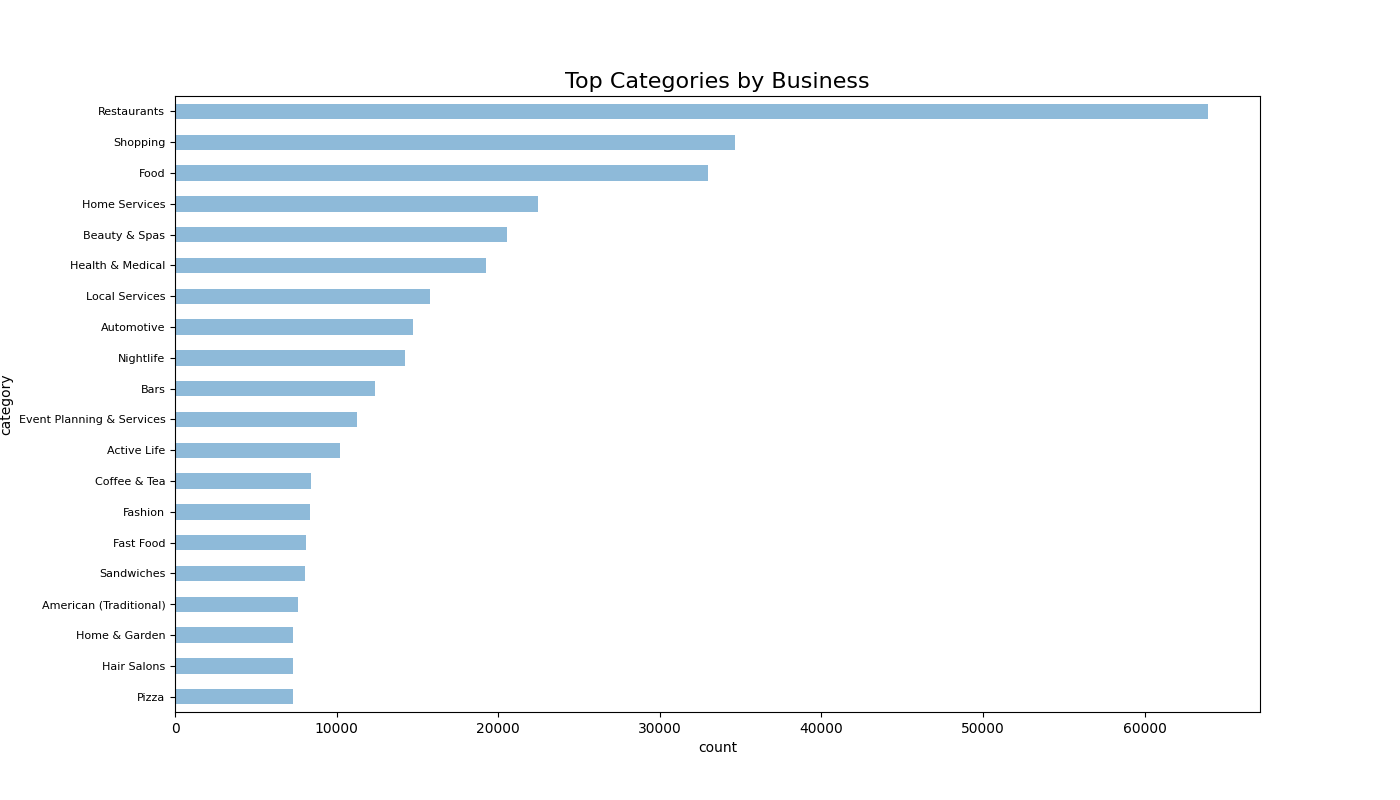

In [21]:
%matplot plt

## Do Yelp Reviews Skew Negative?
Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.
How true is this really? Let's try and answer this question.
### Loading User Data
We begin by loading the user data set from S3 and printing schema to determine what data is available.

In [22]:
dfReview = spark.read.json('s3://sta9760-project2/yelp-dataset/*review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Overview of Review data
Number of rows and columns in our dataset.

In [23]:
print(f'Total Columns: {len(dfReview.dtypes)}')
print(f'Total Rows: {dfReview.count():,}')
dfReview.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 9
Total Rows: 8,021,122
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Top 5 rows of Review dataset only with 'business_id' and 'stars' columns

In [24]:
dfReview.select('business_id', 'stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

To find average stars for each business in review dataset, we need to group our df by 'business_id' and use avg() function

In [25]:
dfReview.select('business_id','stars').groupBy("business_id").avg().show(5)

dfReview_Avg = dfReview.select('business_id','stars').groupBy("business_id").avg()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

#### Before we join our dataframes, we can check if both df have the same amount of rows or not

Now we can join our both df and store under dfJoined

In [26]:
dfJoined = dfBusiness.join(dfReview_Avg, on=['business_id'], how='inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
dfJoined = dfJoined.select('avg(stars)','stars','name','city','state').sort('avg(stars)', ascending=False)
dfJoined.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+---------------+-----+
|avg(stars)|stars|                name|           city|state|
+----------+-----+--------------------+---------------+-----+
|       5.0|  5.0|Diamond Finish De...|      Avon Lake|   OH|
|       5.0|  5.0|DB Mobile Notary ...|      Las Vegas|   NV|
|       5.0|  5.0|         Xoxo Lashes|North Las Vegas|   NV|
|       5.0|  5.0|          Econolight|        Phoenix|   AZ|
|       5.0|  5.0|         Beezy Booth|         Peoria|   AZ|
+----------+-----+--------------------+---------------+-----+
only showing top 5 rows

To calculate 'skew' between stars from business df and avg(stars) from review df, we follow formula below;

In [28]:
dfJoined = dfJoined.withColumn('skew',(dfJoined['avg(stars)'] - dfJoined['stars'])/dfJoined['stars'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
dfJoined.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+--------------------+---------+-----+----+
|avg(stars)|stars|                name|     city|state|skew|
+----------+-----+--------------------+---------+-----+----+
|       5.0|  5.0|         Print Smart| Chandler|   AZ| 0.0|
|       5.0|  5.0|Martial Arts Cent...|Las Vegas|   NV| 0.0|
|       5.0|  5.0|     Herbology Tours|Las Vegas|   NV| 0.0|
|       5.0|  5.0|             Rococoa|  Toronto|   ON| 0.0|
|       5.0|  5.0|Just Teazzin Hair...|     Mesa|   AZ| 0.0|
+----------+-----+--------------------+---------+-----+----+
only showing top 5 rows

We will convert our dataframe into pandas dataframe and plot

In [30]:
dfPandas2 = dfJoined.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
import seaborn

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
fig, ax = plt.subplots(figsize=(10,5))

seaborn.distplot(dfPandas2['skew'], ax=ax)
ax.set_title('Rating Skewness')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Rating Skewness')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

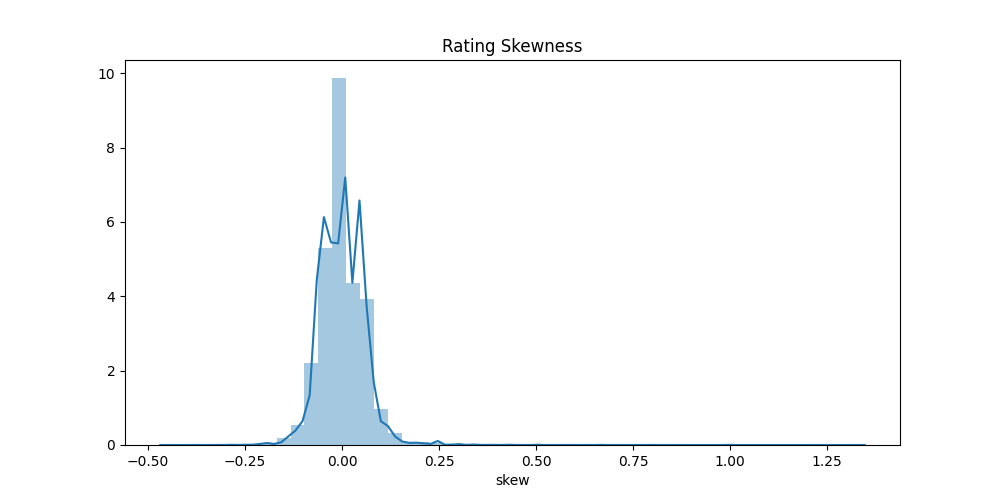

In [33]:
%matplot plt

## Should Elite be Trusted ?

### We start with uploading our user data

In [34]:
dfUser = spark.read.json('s3://sta9760-project2/yelp-dataset/*user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
print(f'Total Columns: {len(dfUser.dtypes)}')
print(f'Total Rows: {dfUser.count():,}')
dfUser.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 22
Total Rows: 1,968,703
root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

* We filter out all non-elite users from our data and assign to dfElite

In [36]:
dfElite = dfUser[dfUser.elite !=""]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
dfElite.select('user_id','elite','review_count').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+------------+
|             user_id|               elite|review_count|
+--------------------+--------------------+------------+
|FOBRPlBHa3WPHFB5q...|2008,2009,2010,20...|         564|
|zZUnPeh2hEp0WydbA...|                2010|          60|
|QaELAmRcDc5TfJEyl...|                2009|         206|
|xvu8G900tezTzbbfq...|2009,2010,2011,20...|         485|
|z5_82komKV3mI4ASG...|                2007|         186|
+--------------------+--------------------+------------+
only showing top 5 rows

* Now we inner-join our Elite User df with Review df on 'user_id'

In [38]:
dfReview_Elite = dfElite.join(dfReview, on=['user_id'], how='inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
dfReview_Elite.select('business_id','stars').groupBy("business_id").avg().show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|        avg(stars)|
+--------------------+------------------+
|ipFreSFhjClfNETuM...|3.0588235294117645|
|OyhCNhJJuJjUt2avx...| 3.282051282051282|
|eKznX8VTfcQrjCqXp...| 4.268817204301075|
|--9e1ONYQuAa-CB_R...|4.1916058394160585|
|-r8SvItXXG6_T3mP5...|               3.5|
+--------------------+------------------+
only showing top 5 rows

* We are grouping our Elite-user data by each business to list average stars from Elite-users and assign to dfElite_Avg 

In [40]:
dfElite_Avg = dfReview_Elite.select('business_id','stars').groupBy("business_id").avg()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

* Now we can join our Business df with Review_Elite df on 'business_id', 
* So we can compare the skew values between business stars with elite user's star values for those businesses

In [41]:
dfJoined2 = dfElite_Avg.join(dfBusiness, on=['business_id'], how='inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

* Skew values between business overall stars vs elite user stars for same businesses 

In [42]:
dfJoined2 = dfJoined2.withColumn("skew2",(dfJoined2['avg(stars)']-dfJoined2['stars'])/dfJoined2['stars'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
dfPandas3 = dfJoined2.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
fig, ax = plt.subplots(figsize=(10,5))

seaborn.distplot(dfPandas3['skew2'], ax=ax)
ax.set_title('Elite Users')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'Elite Users')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

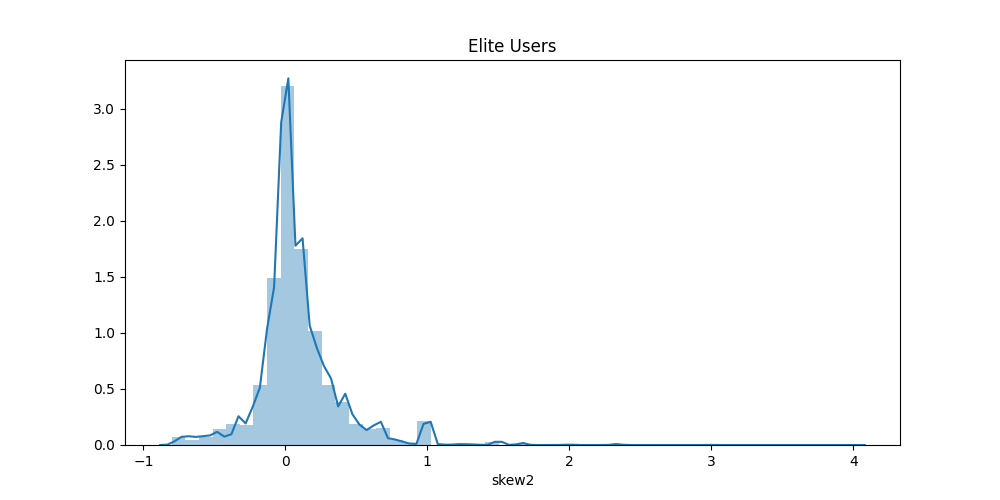

In [45]:
%matplot plt

### Comparison of 2 Histogram Graphs in Same Plot

In [46]:
fig, ax = plt.subplots(figsize=(10,5))

seaborn.distplot(dfPandas2['skew'], ax=ax)
seaborn.distplot(dfPandas3['skew2'], ax=ax)
ax.set_title('''
Comparison of Skew 
Entire Users vs Elite Users''')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, '\nComparison of Skew \nEntire Users vs Elite Users')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

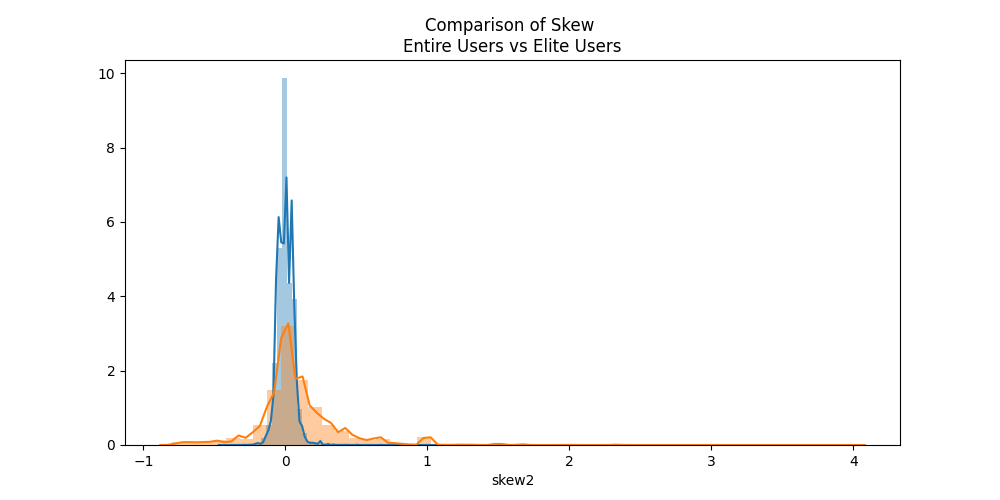

In [47]:
%matplot plt

### Star values given by elite users are more extreme than star values populated by entire users, on both positive and negative side